<a href="https://colab.research.google.com/github/HenryU20201C579/TP_BigData_Diaz_Becerra/blob/main/TP_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
!apt-get install default-jre

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [187]:
!java -version

openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [188]:
!pip install h2o

In [189]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [190]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,41 mins 17 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_jdm1fc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [191]:
data_h2o = h2o.import_file(
                path   = "/content/Mall_Customers.csv",
                header = 1,
                sep    = ",",
                destination_frame = "datos_h2o"
            )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [192]:
data_h2o.head()

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72


In [193]:
predictors = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]
predictors

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [194]:
train, test = data_h2o.split_frame(ratios=[.9], seed = 1234)

In [195]:
train.head()

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
11,Male,67,19,14
12,Female,35,19,99


In [196]:
test.head()

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,Female,23,16,77
10,Female,30,19,72
19,Male,52,23,29
20,Female,35,23,98
27,Female,45,28,32
33,Male,53,33,4
39,Female,36,37,26
52,Male,33,42,60
65,Male,63,48,51
67,Female,43,48,50


In [197]:
from h2o.estimators import H2OKMeansEstimator

In [198]:
kmeans = H2OKMeansEstimator(k=3, standardize=True, seed = 1234)

In [199]:
kmeans.train(x= predictors, training_frame=train, validation_frame=test)

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OKMeansEstimator : K-means
Model Key: KMeans_model_python_1714843398422_10


Model Summary: 
    number_of_rows    number_of_clusters    number_of_categorical_columns    number_of_iterations    within_cluster_sum_of_squares    total_sum_of_squares    between_cluster_sum_of_squares
--  ----------------  --------------------  -------------------------------  ----------------------  -------------------------------  ----------------------  --------------------------------
    177               3                     0                                6                       253.754                          528                     274.246

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 253.754300280965
Total Sum of Square Error to Grand Mean: 528.000001875931
Between Cluster Sum of Square Error: 274.245701594966

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           74      113.864
    2           41      45.5378
    3           62      94.353

ModelMetricsClustering: kmeans
** Reported on validation data. **

Total Within Cluster Sum of Square Error: 43.32469560136765
Total Sum of Square Error to Grand Mean: 67.32476886637133
Between Cluster Sum of Square Error: 24.000073265003678

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           13      26.5872
    2           4       5.95973
    3           6       10.7778

Scoring History: 
    timestamp            duration    iterations    number_of_reassigned_observations    within_cluster_sum_of_squares
--  -------------------  ----------  ------------  -----------------------------------  -------------------------------
    2024-05-04 18:04:44  0.003 sec   0             nan                                  nan
    2024-05-04 18:04:44  0.007 sec   1             177                                  591.55
    2024-05-04 18:04:44  0.009 sec   2             20                                   326.182
    2024-05-04 18:04:44  0.010 sec   3             15                                   294.909
    2024-05-04 18:04:44  0.013 sec   4             12                                   264.072
    2024-05-04 18:04:44  0.016 sec   5             5                                    254.679
    2024-05-04 18:04:44  0.019 sec   6             0                                    253.754

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [200]:
prediction_train = kmeans.predict(train)
prediction_train

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


predict
2
2
2
2
2
2
2
0
0
2


In [201]:
prediction_train['predict'].unique()

C1
2
0
1


In [202]:
prediction_test = kmeans.predict(test)
prediction_test

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


predict
2
2
0
2
0
0
2
2
0
0


In [203]:
prediction_test['predict'].unique()

C1
2
0
1


In [204]:
train["segmento"] = prediction_train["predict"].asfactor()
train.head()

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),segmento
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
5,Female,31,17,40,2
6,Female,22,17,76,2
7,Female,35,18,6,2
8,Female,23,18,94,2
9,Male,64,19,3,0
11,Male,67,19,14,0
12,Female,35,19,99,2


In [205]:
train.group_by(['segmento']).count(na ="all").get_frame()

segmento,nrow
0,74
1,41
2,62


In [206]:
train.group_by(['segmento']).mean(["Age", "Annual Income (k$)",	"Spending Score (1-100)"], na="all").get_frame()

segmento,mean_Age,mean_Annual Income (k$),mean_Spending Score (1-100)
0,52.2568,59.3378,34.9459
1,33.4146,89.2439,76.4146
2,25.2581,43.7419,52.5


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


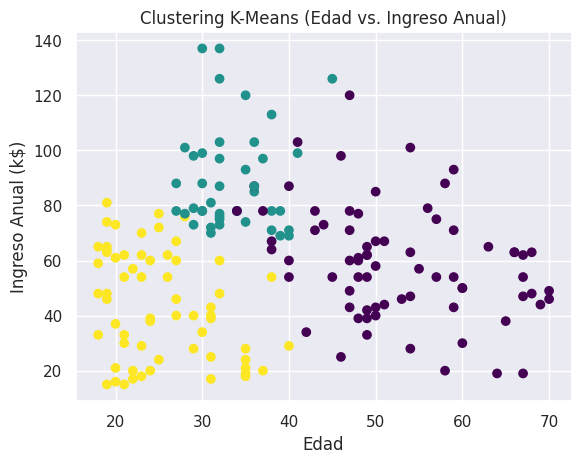

In [209]:
train_df = train.as_data_frame()

train_labels = train_df["segmento"]

plt.scatter(train_df["Age"], train_df["Annual Income (k$)"], c=train_labels, cmap="viridis")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.title("Clustering K-Means (Edad vs. Ingreso Anual)")
plt.show()

In [210]:
correlation_matrix = train_df[predictors].corr()
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.005155               -0.326568
Annual Income (k$)     -0.005155            1.000000                0.054418
Spending Score (1-100) -0.326568            0.054418                1.000000


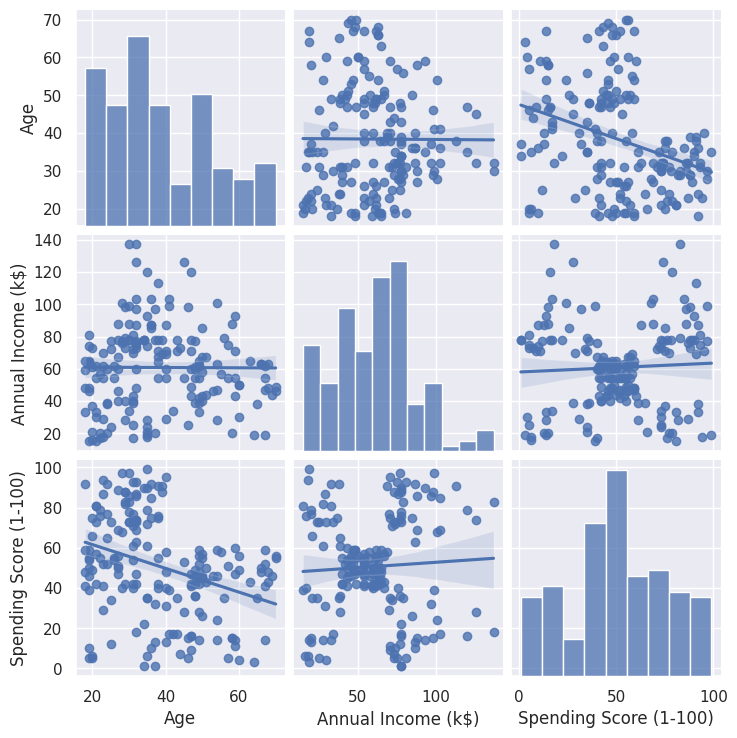

In [214]:
import seaborn as sns

sns.pairplot(train_df[predictors], kind='reg')
plt.show()
